In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys

In [2]:
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/"
data_path = base_path + "/data"

In [3]:
!pwd

/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/src/notebooks/bayessian_fairness


In [4]:
sys.path.insert(1, base_path)

In [5]:
from src.continuous.utils.data_utils import get_continuous_compas_dataset

# load data


In [6]:
train_data, test_data, X_atr, Y_atr, Z_atr, n_y, n_z = get_continuous_compas_dataset(data_path=data_path,norm=False)

In [62]:
unique = {}
rename_dict = {}
total_unique = 0
for feature in X_atr:
    unique[feature] = np.sort(train_data[feature].unique())
    total_unique += len(unique[feature])
    tmp_rename_dict = {real_value:float(fake_value) for fake_value, real_value in enumerate(unique[feature])}
    rename_dict[feature] = tmp_rename_dict
    
total_unique

73

In [63]:
unique

{'age_cat': array([0., 1., 2.], dtype=float32),
 'juv_fel_count': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 20.],
       dtype=float32),
 'juv_misd_count': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8., 12., 13.], dtype=float32),
 'juv_other_count': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 17.], dtype=float32),
 'priors_count': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 33., 35., 36., 37., 38.],
       dtype=float32),
 'c_charge_degree': array([0., 1.], dtype=float32)}

In [64]:
rename_dict

{'age_cat': {0.0: 0.0, 1.0: 1.0, 2.0: 2.0},
 'juv_fel_count': {0.0: 0.0,
  1.0: 1.0,
  2.0: 2.0,
  3.0: 3.0,
  4.0: 4.0,
  5.0: 5.0,
  6.0: 6.0,
  8.0: 7.0,
  9.0: 8.0,
  10.0: 9.0,
  20.0: 10.0},
 'juv_misd_count': {0.0: 0.0,
  1.0: 1.0,
  2.0: 2.0,
  3.0: 3.0,
  4.0: 4.0,
  5.0: 5.0,
  6.0: 6.0,
  8.0: 7.0,
  12.0: 8.0,
  13.0: 9.0},
 'juv_other_count': {0.0: 0.0,
  1.0: 1.0,
  2.0: 2.0,
  3.0: 3.0,
  4.0: 4.0,
  5.0: 5.0,
  6.0: 6.0,
  7.0: 7.0,
  9.0: 8.0,
  17.0: 9.0},
 'priors_count': {0.0: 0.0,
  1.0: 1.0,
  2.0: 2.0,
  3.0: 3.0,
  4.0: 4.0,
  5.0: 5.0,
  6.0: 6.0,
  7.0: 7.0,
  8.0: 8.0,
  9.0: 9.0,
  10.0: 10.0,
  11.0: 11.0,
  12.0: 12.0,
  13.0: 13.0,
  14.0: 14.0,
  15.0: 15.0,
  16.0: 16.0,
  17.0: 17.0,
  18.0: 18.0,
  19.0: 19.0,
  20.0: 20.0,
  21.0: 21.0,
  22.0: 22.0,
  23.0: 23.0,
  24.0: 24.0,
  25.0: 25.0,
  26.0: 26.0,
  27.0: 27.0,
  28.0: 28.0,
  29.0: 29.0,
  30.0: 30.0,
  31.0: 31.0,
  33.0: 32.0,
  35.0: 33.0,
  36.0: 34.0,
  37.0: 35.0,
  38.0: 36.0},
 'c_ch

In [79]:
train_data[X_atr] = train_data[X_atr].replace(rename_dict)

In [82]:
np.sort(train_data[X_atr]["juv_other_count"].unique())

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [90]:
new_enc = [] 
for feature in X_atr:
    new_enc += [pd.get_dummies(train_data[feature],prefix=feature)]
data = pd.concat(new_enc,axis=1)
data

,age_cat_0.0,age_cat_1.0,age_cat_2.0,juv_fel_count_0.0,juv_fel_count_1.0,juv_fel_count_2.0,juv_fel_count_3.0,juv_fel_count_4.0,juv_fel_count_5.0,juv_fel_count_6.0,...,priors_count_29.0,priors_count_30.0,priors_count_31.0,priors_count_32.0,priors_count_33.0,priors_count_34.0,priors_count_35.0,priors_count_36.0,c_charge_degree_0.0,c_charge_degree_1.0
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
print("training size:", train_data.shape)
print("testing size:", test_data.shape)

training size: (6000, 10)
testing size: (1214, 10)


# encode data

# Discrete models

In [92]:
from src.continuous.models.models import get_models

In [93]:
Py, Pz_y, model_y_x, model_z_yx = get_models(data=train_data,
                                             X_atr=X_atr,
                                             Y_atr=Y_atr,
                                             Z_atr=Z_atr,
                                             n_y=n_y,
                                             n_z=n_z)

In [94]:
# generate y
train_data_y= np.random.binomial(n = 1, p = Py[1], size = (1000))

# generate p_z_y
train_data_z = np.random.multinomial(n=1, pvals= Pz_y[:,1], size = 1000 )

In [95]:
train_data["z"].unique()

array([ 0.,  1.,  2.,  8.,  3.,  7.,  6.,  9., 11.,  4.,  5., 10.],
      dtype=float32)

In [96]:
Pz_y[:,1]

array([0.03759259, 0.5087037 , 0.24166667, 0.06018519, 0.00240741,
       0.00240741, 0.00462963, 0.06981481, 0.06166667, 0.00944444,
       0.00055556, 0.00092593])

# Gan

In [143]:
def make_generator_model(latent_dim, x_dim, unique):
    z = tf.keras.Input((latent_dim, ))
    x = tf.keras.layers.Dense(latent_dim/2, "relu")(z)
    x = tf.keras.layers.Dense(x_dim/2, "relu")(x)
    x = tf.keras.layers.Dense(x_dim, "relu")(x)

    sub_models = []
    for key, value in unique.items():
        key_x = tf.keras.layers.Dense(len(value), "softmax", name=f"dense_{key}")(x)
        sub_models += [key_x]
    concat = tf.concat(sub_models, -1)
    generator = tf.keras.Model(z, concat)
    return generator

In [144]:
generator.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 dense_81 (Dense)               (None, 10)           210         ['input_16[0][0]']               
                                                                                                  
 dense_82 (Dense)               (None, 36)           396         ['dense_81[0][0]']               
                                                                                                  
 dense_83 (Dense)               (None, 73)           2701        ['dense_82[0][0]']               
                                                                                           

In [145]:
def make_discriminator(x_dim):
    input_x = tf.keras.Input((x_dim, ))
    x = tf.keras.layers.Dense(x_dim/2, "relu")(input_x)
    x = tf.keras.layers.Dense(x_dim/4, "relu")(x)
    y = tf.keras.layers.Dense(1, "sigmoid")(x)
    discriminator = tf.keras.Model(input_x, y)
    return discriminator

In [146]:
latent_dim = 20
x_dim = len(data.columns)
generator = make_generator_model(latent_dim, x_dim, unique)
discriminator  = make_discriminator(x_dim)

cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

In [147]:
generator.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 dense_87 (Dense)               (None, 10)           210         ['input_18[0][0]']               
                                                                                                  
 dense_88 (Dense)               (None, 36)           396         ['dense_87[0][0]']               
                                                                                                  
 dense_89 (Dense)               (None, 73)           2701        ['dense_88[0][0]']               
                                                                                           

In [148]:
discriminator.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 73)]              0         
                                                                 
 dense_90 (Dense)            (None, 36)                2664      
                                                                 
 dense_91 (Dense)            (None, 18)                666       
                                                                 
 dense_92 (Dense)            (None, 1)                 19        
                                                                 
Total params: 3,349
Trainable params: 3,349
Non-trainable params: 0
_________________________________________________________________


In [149]:
noise = tf.random.normal([100, latent_dim])
generated_x = generator(noise, training=False)

In [150]:
tf.shape(noise)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=100>

# Training loop

In [200]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss, fake_loss

gen_tracker = tf.keras.metrics.Mean(name="gen_loss")
disc_tracker = tf.keras.metrics.Mean(name="disc_loss")
disc_fake_tracker = tf.keras.metrics.Mean(name="disc_fake_loss")
disc_real_tracker = tf.keras.metrics.Mean(name="disc_real_loss")

class GanTrainer(tf.keras.Model):
    
    def __init__(self, discriminator, generator, latent_dim):
        super(GanTrainer, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
    
#     @tf.function
#     def eval_step(input_data):
#         BATCH_SIZE = tf.shape(input_data)[0]
#         noise = tf.random.normal([BATCH_SIZE, self.latent_dim])
        
#         generated_data = self.generator(noise, training=False)
        
#         real_output = self.discriminator(input_data, training=False)
#         fake_output = self.discriminator(generated_data, training=False)
        
#         gen_loss = generator_loss(fake_output)
#         disc_loss = discriminator_loss(real_output, fake_output)
        
    @tf.function
    def train_step(self, data):
        input_data, y = data
        BATCH_SIZE = tf.shape(input_data)[0]
        noise = tf.random.normal([BATCH_SIZE, self.latent_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(noise, training=True)

            real_output = self.discriminator(input_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)

            gen_loss = 2.0 * generator_loss(fake_output)
            real_loss, fake_loss = discriminator_loss(real_output, fake_output)
            disc_loss = real_loss + fake_loss


        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        gen_tracker.update_state(gen_loss)
        disc_tracker.update_state(disc_loss)
        disc_fake_tracker.update_state(fake_loss)
        disc_real_tracker.update_state(real_loss)
        
        metrics = {}
        metrics["gen_loss"] = gen_tracker.result()  
        metrics["disc_loss"] = disc_tracker.result()
        metrics["disc_fake_loss"] = disc_fake_tracker.result()
        metrics["disc_real_tracker"] = disc_real_tracker.result()
        
        return metrics
    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [disc_tracker , gen_tracker]

In [201]:
gan_trainer = GanTrainer(generator=generator, discriminator=discriminator, latent_dim=latent_dim)
gan_trainer.compile()

In [211]:
hist = gan_trainer.fit(x=data,
                       y=data,
                       batch_size=32,
                       shuffle=True,
                       epochs=2000).history

Epoch 1/2000
188/188 [==============================] - 0s 687us/step - gen_loss: 2.6819 - disc_loss: 0.8382 - disc_fake_loss: 0.4310 - disc_real_tracker: 0.5117
Epoch 2/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 0.3637 - disc_loss: 4.9347 - disc_fake_loss: 0.4389 - disc_real_tracker: 0.5121
Epoch 3/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 0.0656 - disc_loss: 4.6851 - disc_fake_loss: 0.4575 - disc_real_tracker: 0.5145
Epoch 4/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 0.2078 - disc_loss: 3.7582 - disc_fake_loss: 0.4696 - disc_real_tracker: 0.5183
Epoch 5/2000
188/188 [==============================] - 0s 660us/step - gen_loss: 0.4980 - disc_loss: 3.0726 - disc_fake_loss: 0.4766 - disc_real_tracker: 0.5229
Epoch 6/2000
188/188 [==============================] - 0s 649us/step - gen_loss: 0.8857 - disc_loss: 2.6296 - disc_fake_loss: 0.4804 - disc_real_tracker: 0.5280
Epoch 7/2000
188/188 [======

188/188 [==============================] - 0s 650us/step - gen_loss: 5.3770 - disc_loss: 0.2736 - disc_fake_loss: 0.4466 - disc_real_tracker: 0.5245
Epoch 52/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 5.4872 - disc_loss: 0.2523 - disc_fake_loss: 0.4451 - disc_real_tracker: 0.5231
Epoch 53/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 4.5695 - disc_loss: 0.2912 - disc_fake_loss: 0.4437 - disc_real_tracker: 0.5218
Epoch 54/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 4.8557 - disc_loss: 0.2810 - disc_fake_loss: 0.4423 - disc_real_tracker: 0.5205
Epoch 55/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 3.1612 - disc_loss: 1.3866 - disc_fake_loss: 0.4417 - disc_real_tracker: 0.5192
Epoch 56/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 0.1902 - disc_loss: 2.7583 - disc_fake_loss: 0.4489 - disc_real_tracker: 0.5181
Epoch 57/2000
188/188 [=============

188/188 [==============================] - 0s 647us/step - gen_loss: 1.3501 - disc_loss: 1.5741 - disc_fake_loss: 0.4739 - disc_real_tracker: 0.5270
Epoch 102/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 1.3767 - disc_loss: 1.5458 - disc_fake_loss: 0.4746 - disc_real_tracker: 0.5281
Epoch 103/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 1.5563 - disc_loss: 1.4654 - disc_fake_loss: 0.4753 - disc_real_tracker: 0.5291
Epoch 104/2000
188/188 [==============================] - 0s 637us/step - gen_loss: 1.8324 - disc_loss: 1.3230 - disc_fake_loss: 0.4756 - disc_real_tracker: 0.5301
Epoch 105/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 2.0305 - disc_loss: 1.2035 - disc_fake_loss: 0.4756 - disc_real_tracker: 0.5310
Epoch 106/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 2.2007 - disc_loss: 1.0926 - disc_fake_loss: 0.4754 - disc_real_tracker: 0.5316
Epoch 107/2000
188/188 [=======

188/188 [==============================] - 0s 680us/step - gen_loss: 2.6240 - disc_loss: 0.8011 - disc_fake_loss: 0.4592 - disc_real_tracker: 0.5166
Epoch 152/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 2.7194 - disc_loss: 0.7579 - disc_fake_loss: 0.4587 - disc_real_tracker: 0.5165
Epoch 153/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.7086 - disc_loss: 0.7387 - disc_fake_loss: 0.4583 - disc_real_tracker: 0.5163
Epoch 154/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 2.9092 - disc_loss: 0.7129 - disc_fake_loss: 0.4578 - disc_real_tracker: 0.5161
Epoch 155/2000
188/188 [==============================] - 0s 646us/step - gen_loss: 2.9542 - disc_loss: 0.6806 - disc_fake_loss: 0.4572 - disc_real_tracker: 0.5159
Epoch 156/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 2.6864 - disc_loss: 0.7387 - disc_fake_loss: 0.4567 - disc_real_tracker: 0.5156
Epoch 157/2000
188/188 [=======

188/188 [==============================] - 0s 647us/step - gen_loss: 0.0061 - disc_loss: 6.9422 - disc_fake_loss: 0.4527 - disc_real_tracker: 0.5121
Epoch 202/2000
188/188 [==============================] - 0s 672us/step - gen_loss: 0.0199 - disc_loss: 5.8358 - disc_fake_loss: 0.4649 - disc_real_tracker: 0.5132
Epoch 203/2000
188/188 [==============================] - 0s 661us/step - gen_loss: 0.0552 - disc_loss: 4.9881 - disc_fake_loss: 0.4742 - disc_real_tracker: 0.5149
Epoch 204/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 0.1560 - disc_loss: 4.1233 - disc_fake_loss: 0.4808 - disc_real_tracker: 0.5171
Epoch 205/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 0.1308 - disc_loss: 4.5854 - disc_fake_loss: 0.4860 - disc_real_tracker: 0.5197
Epoch 206/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 0.1432 - disc_loss: 4.3350 - disc_fake_loss: 0.4924 - disc_real_tracker: 0.5224
Epoch 207/2000
188/188 [=======

188/188 [==============================] - 0s 649us/step - gen_loss: 1.8156 - disc_loss: 1.4754 - disc_fake_loss: 0.5067 - disc_real_tracker: 0.5360
Epoch 252/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 0.8443 - disc_loss: 1.4590 - disc_fake_loss: 0.5086 - disc_real_tracker: 0.5355
Epoch 253/2000
188/188 [==============================] - 0s 649us/step - gen_loss: 1.3995 - disc_loss: 1.1071 - disc_fake_loss: 0.5094 - disc_real_tracker: 0.5352
Epoch 254/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 1.8861 - disc_loss: 0.9281 - disc_fake_loss: 0.5095 - disc_real_tracker: 0.5350
Epoch 255/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 2.2861 - disc_loss: 0.8189 - disc_fake_loss: 0.5094 - disc_real_tracker: 0.5347
Epoch 256/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.6110 - disc_loss: 0.7408 - disc_fake_loss: 0.5090 - disc_real_tracker: 0.5345
Epoch 257/2000
188/188 [=======

188/188 [==============================] - 0s 654us/step - gen_loss: 2.7948 - disc_loss: 0.7442 - disc_fake_loss: 0.5007 - disc_real_tracker: 0.5313
Epoch 302/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 2.5865 - disc_loss: 0.8117 - disc_fake_loss: 0.5002 - disc_real_tracker: 0.5312
Epoch 303/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 1.3015 - disc_loss: 1.4186 - disc_fake_loss: 0.5006 - disc_real_tracker: 0.5312
Epoch 304/2000
188/188 [==============================] - 0s 675us/step - gen_loss: 2.2311 - disc_loss: 1.0990 - disc_fake_loss: 0.5007 - disc_real_tracker: 0.5315
Epoch 305/2000
188/188 [==============================] - 0s 695us/step - gen_loss: 2.5985 - disc_loss: 0.9752 - disc_fake_loss: 0.5004 - disc_real_tracker: 0.5318
Epoch 306/2000
188/188 [==============================] - 0s 695us/step - gen_loss: 2.7114 - disc_loss: 0.8852 - disc_fake_loss: 0.5000 - disc_real_tracker: 0.5319
Epoch 307/2000
188/188 [=======

188/188 [==============================] - 0s 767us/step - gen_loss: 2.6729 - disc_loss: 0.6643 - disc_fake_loss: 0.4840 - disc_real_tracker: 0.5246
Epoch 352/2000
188/188 [==============================] - 0s 662us/step - gen_loss: 2.6731 - disc_loss: 0.7161 - disc_fake_loss: 0.4837 - disc_real_tracker: 0.5243
Epoch 353/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.9558 - disc_loss: 0.6657 - disc_fake_loss: 0.4833 - disc_real_tracker: 0.5241
Epoch 354/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 3.0114 - disc_loss: 0.6320 - disc_fake_loss: 0.4829 - disc_real_tracker: 0.5239
Epoch 355/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 3.0800 - disc_loss: 0.6049 - disc_fake_loss: 0.4825 - disc_real_tracker: 0.5236
Epoch 356/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 0.4143 - disc_loss: 4.7527 - disc_fake_loss: 0.4852 - disc_real_tracker: 0.5235
Epoch 357/2000
188/188 [=======

188/188 [==============================] - 0s 642us/step - gen_loss: 4.9254 - disc_loss: 0.2154 - disc_fake_loss: 0.5377 - disc_real_tracker: 0.5446
Epoch 402/2000
188/188 [==============================] - 0s 908us/step - gen_loss: 4.9050 - disc_loss: 0.2061 - disc_fake_loss: 0.5369 - disc_real_tracker: 0.5439
Epoch 403/2000
188/188 [==============================] - 0s 951us/step - gen_loss: 3.3248 - disc_loss: 0.3746 - disc_fake_loss: 0.5363 - disc_real_tracker: 0.5432
Epoch 404/2000
188/188 [==============================] - 0s 884us/step - gen_loss: 4.3106 - disc_loss: 0.3032 - disc_fake_loss: 0.5357 - disc_real_tracker: 0.5426
Epoch 405/2000
188/188 [==============================] - 0s 901us/step - gen_loss: 4.6680 - disc_loss: 0.2753 - disc_fake_loss: 0.5350 - disc_real_tracker: 0.5420
Epoch 406/2000
188/188 [==============================] - 0s 916us/step - gen_loss: 4.8802 - disc_loss: 0.2529 - disc_fake_loss: 0.5343 - disc_real_tracker: 0.5414
Epoch 407/2000
188/188 [=======

188/188 [==============================] - 0s 642us/step - gen_loss: 1.9581 - disc_loss: 1.0848 - disc_fake_loss: 0.5312 - disc_real_tracker: 0.5283
Epoch 452/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 2.0457 - disc_loss: 1.0269 - disc_fake_loss: 0.5310 - disc_real_tracker: 0.5284
Epoch 453/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 2.1265 - disc_loss: 0.9786 - disc_fake_loss: 0.5309 - disc_real_tracker: 0.5285
Epoch 454/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.1984 - disc_loss: 0.9355 - disc_fake_loss: 0.5307 - disc_real_tracker: 0.5285
Epoch 455/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 2.2634 - disc_loss: 0.8980 - disc_fake_loss: 0.5305 - disc_real_tracker: 0.5285
Epoch 456/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 2.3292 - disc_loss: 0.8628 - disc_fake_loss: 0.5303 - disc_real_tracker: 0.5284
Epoch 457/2000
188/188 [=======

188/188 [==============================] - 0s 640us/step - gen_loss: 2.4955 - disc_loss: 0.7742 - disc_fake_loss: 0.5205 - disc_real_tracker: 0.5268
Epoch 502/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.4616 - disc_loss: 0.8547 - disc_fake_loss: 0.5203 - disc_real_tracker: 0.5267
Epoch 503/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.7026 - disc_loss: 0.7983 - disc_fake_loss: 0.5200 - disc_real_tracker: 0.5267
Epoch 504/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 2.7719 - disc_loss: 0.7477 - disc_fake_loss: 0.5197 - disc_real_tracker: 0.5266
Epoch 505/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.8309 - disc_loss: 0.7057 - disc_fake_loss: 0.5194 - disc_real_tracker: 0.5265
Epoch 506/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 2.7955 - disc_loss: 0.6993 - disc_fake_loss: 0.5190 - disc_real_tracker: 0.5264
Epoch 507/2000
188/188 [=======

188/188 [==============================] - 0s 646us/step - gen_loss: 4.9045 - disc_loss: 0.2665 - disc_fake_loss: 0.5190 - disc_real_tracker: 0.5240
Epoch 552/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 4.9910 - disc_loss: 0.2580 - disc_fake_loss: 0.5184 - disc_real_tracker: 0.5235
Epoch 553/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 4.8677 - disc_loss: 0.2620 - disc_fake_loss: 0.5178 - disc_real_tracker: 0.5231
Epoch 554/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 5.0350 - disc_loss: 0.2624 - disc_fake_loss: 0.5173 - disc_real_tracker: 0.5226
Epoch 555/2000
188/188 [==============================] - 0s 635us/step - gen_loss: 2.9574 - disc_loss: 1.0934 - disc_fake_loss: 0.5169 - disc_real_tracker: 0.5221
Epoch 556/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 0.9665 - disc_loss: 1.3963 - disc_fake_loss: 0.5179 - disc_real_tracker: 0.5218
Epoch 557/2000
188/188 [=======

188/188 [==============================] - 0s 644us/step - gen_loss: 2.9671 - disc_loss: 0.7340 - disc_fake_loss: 0.5072 - disc_real_tracker: 0.5195
Epoch 602/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 2.6849 - disc_loss: 0.7816 - disc_fake_loss: 0.5070 - disc_real_tracker: 0.5194
Epoch 603/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 2.8447 - disc_loss: 0.7273 - disc_fake_loss: 0.5067 - disc_real_tracker: 0.5194
Epoch 604/2000
188/188 [==============================] - 0s 664us/step - gen_loss: 2.9027 - disc_loss: 0.6825 - disc_fake_loss: 0.5064 - disc_real_tracker: 0.5193
Epoch 605/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 2.9649 - disc_loss: 0.6120 - disc_fake_loss: 0.5061 - disc_real_tracker: 0.5191
Epoch 606/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 3.0753 - disc_loss: 0.6350 - disc_fake_loss: 0.5058 - disc_real_tracker: 0.5189
Epoch 607/2000
188/188 [=======

188/188 [==============================] - 0s 704us/step - gen_loss: 2.5556 - disc_loss: 0.5682 - disc_fake_loss: 0.5272 - disc_real_tracker: 0.5438
Epoch 652/2000
188/188 [==============================] - 0s 668us/step - gen_loss: 3.3685 - disc_loss: 0.4718 - disc_fake_loss: 0.5269 - disc_real_tracker: 0.5435
Epoch 653/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 3.9023 - disc_loss: 0.4133 - disc_fake_loss: 0.5265 - disc_real_tracker: 0.5432
Epoch 654/2000
188/188 [==============================] - 0s 634us/step - gen_loss: 4.1999 - disc_loss: 0.3737 - disc_fake_loss: 0.5260 - disc_real_tracker: 0.5428
Epoch 655/2000
188/188 [==============================] - 0s 676us/step - gen_loss: 4.4159 - disc_loss: 0.3417 - disc_fake_loss: 0.5255 - disc_real_tracker: 0.5424
Epoch 656/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 4.5724 - disc_loss: 0.3141 - disc_fake_loss: 0.5251 - disc_real_tracker: 0.5421
Epoch 657/2000
188/188 [=======

188/188 [==============================] - 0s 741us/step - gen_loss: 5.4481 - disc_loss: 0.2435 - disc_fake_loss: 0.5032 - disc_real_tracker: 0.5254
Epoch 702/2000
188/188 [==============================] - 0s 900us/step - gen_loss: 5.4639 - disc_loss: 0.2312 - disc_fake_loss: 0.5027 - disc_real_tracker: 0.5250
Epoch 703/2000
188/188 [==============================] - 0s 787us/step - gen_loss: 5.4839 - disc_loss: 0.2222 - disc_fake_loss: 0.5022 - disc_real_tracker: 0.5246
Epoch 704/2000
188/188 [==============================] - 0s 879us/step - gen_loss: 5.5256 - disc_loss: 0.2146 - disc_fake_loss: 0.5017 - disc_real_tracker: 0.5242
Epoch 705/2000
188/188 [==============================] - 0s 763us/step - gen_loss: 1.9020 - disc_loss: 2.0444 - disc_fake_loss: 0.5019 - disc_real_tracker: 0.5238
Epoch 706/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 0.3780 - disc_loss: 2.0576 - disc_fake_loss: 0.5038 - disc_real_tracker: 0.5234
Epoch 707/2000
188/188 [=======

188/188 [==============================] - 0s 930us/step - gen_loss: 2.9191 - disc_loss: 0.6060 - disc_fake_loss: 0.5101 - disc_real_tracker: 0.5221
Epoch 752/2000
188/188 [==============================] - 0s 904us/step - gen_loss: 3.1811 - disc_loss: 0.5650 - disc_fake_loss: 0.5098 - disc_real_tracker: 0.5219
Epoch 753/2000
188/188 [==============================] - 0s 913us/step - gen_loss: 3.3199 - disc_loss: 0.5340 - disc_fake_loss: 0.5095 - disc_real_tracker: 0.5217
Epoch 754/2000
188/188 [==============================] - 0s 728us/step - gen_loss: 2.4848 - disc_loss: 0.7140 - disc_fake_loss: 0.5092 - disc_real_tracker: 0.5215
Epoch 755/2000
188/188 [==============================] - 0s 646us/step - gen_loss: 2.7425 - disc_loss: 0.7163 - disc_fake_loss: 0.5091 - disc_real_tracker: 0.5214
Epoch 756/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 2.9933 - disc_loss: 0.6537 - disc_fake_loss: 0.5088 - disc_real_tracker: 0.5213
Epoch 757/2000
188/188 [=======

188/188 [==============================] - 0s 921us/step - gen_loss: 2.9875 - disc_loss: 0.6747 - disc_fake_loss: 0.4993 - disc_real_tracker: 0.5166
Epoch 802/2000
188/188 [==============================] - 0s 826us/step - gen_loss: 3.0526 - disc_loss: 0.6310 - disc_fake_loss: 0.4991 - disc_real_tracker: 0.5165
Epoch 803/2000
188/188 [==============================] - 0s 652us/step - gen_loss: 3.1575 - disc_loss: 0.5690 - disc_fake_loss: 0.4988 - disc_real_tracker: 0.5163
Epoch 804/2000
188/188 [==============================] - 0s 739us/step - gen_loss: 2.8299 - disc_loss: 0.6277 - disc_fake_loss: 0.4986 - disc_real_tracker: 0.5161
Epoch 805/2000
188/188 [==============================] - 0s 913us/step - gen_loss: 3.1221 - disc_loss: 0.6144 - disc_fake_loss: 0.4983 - disc_real_tracker: 0.5160
Epoch 806/2000
188/188 [==============================] - 0s 928us/step - gen_loss: 3.2513 - disc_loss: 0.5859 - disc_fake_loss: 0.4981 - disc_real_tracker: 0.5158
Epoch 807/2000
188/188 [=======

188/188 [==============================] - 0s 962us/step - gen_loss: 4.4779 - disc_loss: 0.2928 - disc_fake_loss: 0.5005 - disc_real_tracker: 0.5194
Epoch 852/2000
188/188 [==============================] - 0s 717us/step - gen_loss: 4.7570 - disc_loss: 0.2782 - disc_fake_loss: 0.5001 - disc_real_tracker: 0.5191
Epoch 853/2000
188/188 [==============================] - 0s 791us/step - gen_loss: 4.9727 - disc_loss: 0.2595 - disc_fake_loss: 0.4997 - disc_real_tracker: 0.5187
Epoch 854/2000
188/188 [==============================] - 0s 955us/step - gen_loss: 5.0608 - disc_loss: 0.2482 - disc_fake_loss: 0.4994 - disc_real_tracker: 0.5184
Epoch 855/2000
188/188 [==============================] - 0s 918us/step - gen_loss: 5.0860 - disc_loss: 0.2385 - disc_fake_loss: 0.4990 - disc_real_tracker: 0.5181
Epoch 856/2000
188/188 [==============================] - 0s 862us/step - gen_loss: 5.1601 - disc_loss: 0.2304 - disc_fake_loss: 0.4986 - disc_real_tracker: 0.5177
Epoch 857/2000
188/188 [=======

188/188 [==============================] - 0s 692us/step - gen_loss: 2.9309 - disc_loss: 0.7685 - disc_fake_loss: 0.4917 - disc_real_tracker: 0.5134
Epoch 902/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.9584 - disc_loss: 0.7528 - disc_fake_loss: 0.4915 - disc_real_tracker: 0.5134
Epoch 903/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 2.9708 - disc_loss: 0.7377 - disc_fake_loss: 0.4913 - disc_real_tracker: 0.5134
Epoch 904/2000
188/188 [==============================] - 0s 648us/step - gen_loss: 3.0368 - disc_loss: 0.7205 - disc_fake_loss: 0.4911 - disc_real_tracker: 0.5133
Epoch 905/2000
188/188 [==============================] - 0s 659us/step - gen_loss: 3.0274 - disc_loss: 0.7070 - disc_fake_loss: 0.4909 - disc_real_tracker: 0.5133
Epoch 906/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 3.0471 - disc_loss: 0.6867 - disc_fake_loss: 0.4907 - disc_real_tracker: 0.5132
Epoch 907/2000
188/188 [=======

188/188 [==============================] - 0s 650us/step - gen_loss: 1.2938 - disc_loss: 1.8586 - disc_fake_loss: 0.5310 - disc_real_tracker: 0.5350
Epoch 952/2000
188/188 [==============================] - 0s 638us/step - gen_loss: 1.7888 - disc_loss: 1.5869 - disc_fake_loss: 0.5311 - disc_real_tracker: 0.5355
Epoch 953/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 1.7059 - disc_loss: 1.5757 - disc_fake_loss: 0.5311 - disc_real_tracker: 0.5359
Epoch 954/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 1.8067 - disc_loss: 1.5882 - disc_fake_loss: 0.5310 - disc_real_tracker: 0.5363
Epoch 955/2000
188/188 [==============================] - 0s 636us/step - gen_loss: 1.3101 - disc_loss: 1.8085 - disc_fake_loss: 0.5313 - disc_real_tracker: 0.5367
Epoch 956/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 2.1330 - disc_loss: 1.4676 - disc_fake_loss: 0.5313 - disc_real_tracker: 0.5371
Epoch 957/2000
188/188 [=======

188/188 [==============================] - 0s 642us/step - gen_loss: 3.7823 - disc_loss: 0.5253 - disc_fake_loss: 0.5187 - disc_real_tracker: 0.5318
Epoch 1002/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 3.5678 - disc_loss: 0.5476 - disc_fake_loss: 0.5184 - disc_real_tracker: 0.5316
Epoch 1003/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 4.0069 - disc_loss: 0.4831 - disc_fake_loss: 0.5181 - disc_real_tracker: 0.5315
Epoch 1004/2000
188/188 [==============================] - 0s 628us/step - gen_loss: 4.2567 - disc_loss: 0.4304 - disc_fake_loss: 0.5178 - disc_real_tracker: 0.5313
Epoch 1005/2000
188/188 [==============================] - 0s 624us/step - gen_loss: 4.3861 - disc_loss: 0.3830 - disc_fake_loss: 0.5174 - disc_real_tracker: 0.5311
Epoch 1006/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 4.4714 - disc_loss: 0.3471 - disc_fake_loss: 0.5171 - disc_real_tracker: 0.5308
Epoch 1007/2000
188/188 [=

188/188 [==============================] - 0s 648us/step - gen_loss: 2.3835 - disc_loss: 0.8552 - disc_fake_loss: 0.5190 - disc_real_tracker: 0.5267
Epoch 1051/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 2.4221 - disc_loss: 0.8325 - disc_fake_loss: 0.5188 - disc_real_tracker: 0.5266
Epoch 1052/2000
188/188 [==============================] - 0s 636us/step - gen_loss: 2.3994 - disc_loss: 0.8209 - disc_fake_loss: 0.5187 - disc_real_tracker: 0.5266
Epoch 1053/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 2.3779 - disc_loss: 0.8407 - disc_fake_loss: 0.5186 - disc_real_tracker: 0.5265
Epoch 1054/2000
188/188 [==============================] - 0s 643us/step - gen_loss: 2.5344 - disc_loss: 0.8020 - disc_fake_loss: 0.5184 - disc_real_tracker: 0.5265
Epoch 1055/2000
188/188 [==============================] - 0s 638us/step - gen_loss: 2.6252 - disc_loss: 0.7714 - disc_fake_loss: 0.5183 - disc_real_tracker: 0.5265
Epoch 1056/2000
188/188 [=

188/188 [==============================] - 0s 647us/step - gen_loss: 3.0084 - disc_loss: 0.7411 - disc_fake_loss: 0.5268 - disc_real_tracker: 0.5346
Epoch 1100/2000
188/188 [==============================] - 0s 638us/step - gen_loss: 3.3765 - disc_loss: 0.6355 - disc_fake_loss: 0.5265 - disc_real_tracker: 0.5346
Epoch 1101/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 3.6373 - disc_loss: 0.5505 - disc_fake_loss: 0.5263 - disc_real_tracker: 0.5345
Epoch 1102/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 3.8610 - disc_loss: 0.4824 - disc_fake_loss: 0.5260 - disc_real_tracker: 0.5343
Epoch 1103/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 4.0734 - disc_loss: 0.4253 - disc_fake_loss: 0.5257 - disc_real_tracker: 0.5342
Epoch 1104/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 4.2851 - disc_loss: 0.3776 - disc_fake_loss: 0.5254 - disc_real_tracker: 0.5340
Epoch 1105/2000
188/188 [=

188/188 [==============================] - 0s 643us/step - gen_loss: 5.3404 - disc_loss: 0.2593 - disc_fake_loss: 0.5119 - disc_real_tracker: 0.5246
Epoch 1149/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 5.4273 - disc_loss: 0.2523 - disc_fake_loss: 0.5116 - disc_real_tracker: 0.5243
Epoch 1150/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 5.4188 - disc_loss: 0.2425 - disc_fake_loss: 0.5112 - disc_real_tracker: 0.5241
Epoch 1151/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 5.4892 - disc_loss: 0.2348 - disc_fake_loss: 0.5109 - disc_real_tracker: 0.5238
Epoch 1152/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 5.1966 - disc_loss: 0.2437 - disc_fake_loss: 0.5106 - disc_real_tracker: 0.5235
Epoch 1153/2000
188/188 [==============================] - 0s 641us/step - gen_loss: 4.4068 - disc_loss: 0.3234 - disc_fake_loss: 0.5103 - disc_real_tracker: 0.5233
Epoch 1154/2000
188/188 [=

188/188 [==============================] - 0s 644us/step - gen_loss: 2.9023 - disc_loss: 0.7079 - disc_fake_loss: 0.5116 - disc_real_tracker: 0.5183
Epoch 1198/2000
188/188 [==============================] - 0s 649us/step - gen_loss: 3.0373 - disc_loss: 0.6428 - disc_fake_loss: 0.5114 - disc_real_tracker: 0.5183
Epoch 1199/2000
188/188 [==============================] - 0s 638us/step - gen_loss: 3.1653 - disc_loss: 0.5850 - disc_fake_loss: 0.5113 - disc_real_tracker: 0.5182
Epoch 1200/2000
188/188 [==============================] - 0s 638us/step - gen_loss: 3.3218 - disc_loss: 0.5333 - disc_fake_loss: 0.5110 - disc_real_tracker: 0.5180
Epoch 1201/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 3.4826 - disc_loss: 0.4889 - disc_fake_loss: 0.5108 - disc_real_tracker: 0.5179
Epoch 1202/2000
188/188 [==============================] - 0s 639us/step - gen_loss: 3.3990 - disc_loss: 0.4851 - disc_fake_loss: 0.5106 - disc_real_tracker: 0.5177
Epoch 1203/2000
188/188 [=

188/188 [==============================] - 0s 647us/step - gen_loss: 2.5286 - disc_loss: 0.7450 - disc_fake_loss: 0.5041 - disc_real_tracker: 0.5146
Epoch 1247/2000
188/188 [==============================] - 0s 634us/step - gen_loss: 2.6466 - disc_loss: 0.7841 - disc_fake_loss: 0.5040 - disc_real_tracker: 0.5146
Epoch 1248/2000
188/188 [==============================] - 0s 637us/step - gen_loss: 2.8572 - disc_loss: 0.7537 - disc_fake_loss: 0.5039 - disc_real_tracker: 0.5145
Epoch 1249/2000
188/188 [==============================] - 0s 640us/step - gen_loss: 2.9261 - disc_loss: 0.7254 - disc_fake_loss: 0.5037 - disc_real_tracker: 0.5145
Epoch 1250/2000
188/188 [==============================] - 0s 628us/step - gen_loss: 2.9661 - disc_loss: 0.6970 - disc_fake_loss: 0.5035 - disc_real_tracker: 0.5145
Epoch 1251/2000
188/188 [==============================] - 0s 677us/step - gen_loss: 2.1557 - disc_loss: 1.3690 - disc_fake_loss: 0.5034 - disc_real_tracker: 0.5144
Epoch 1252/2000
188/188 [=

188/188 [==============================] - 0s 680us/step - gen_loss: 2.7267 - disc_loss: 0.6406 - disc_fake_loss: 0.5077 - disc_real_tracker: 0.5167
Epoch 1296/2000
188/188 [==============================] - 0s 705us/step - gen_loss: 3.0240 - disc_loss: 0.5809 - disc_fake_loss: 0.5075 - disc_real_tracker: 0.5166
Epoch 1297/2000
188/188 [==============================] - 0s 695us/step - gen_loss: 3.4972 - disc_loss: 0.5000 - disc_fake_loss: 0.5073 - disc_real_tracker: 0.5164
Epoch 1298/2000
188/188 [==============================] - 0s 685us/step - gen_loss: 3.8121 - disc_loss: 0.4360 - disc_fake_loss: 0.5071 - disc_real_tracker: 0.5163
Epoch 1299/2000
188/188 [==============================] - 0s 678us/step - gen_loss: 4.0480 - disc_loss: 0.3862 - disc_fake_loss: 0.5068 - disc_real_tracker: 0.5161
Epoch 1300/2000
188/188 [==============================] - 0s 680us/step - gen_loss: 2.5061 - disc_loss: 0.6366 - disc_fake_loss: 0.5067 - disc_real_tracker: 0.5159
Epoch 1301/2000
188/188 [=

188/188 [==============================] - 0s 651us/step - gen_loss: 5.9317 - disc_loss: 0.2000 - disc_fake_loss: 0.4954 - disc_real_tracker: 0.5074
Epoch 1345/2000
188/188 [==============================] - 0s 658us/step - gen_loss: 5.6866 - disc_loss: 0.2044 - disc_fake_loss: 0.4951 - disc_real_tracker: 0.5071
Epoch 1346/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 5.7878 - disc_loss: 0.2105 - disc_fake_loss: 0.4948 - disc_real_tracker: 0.5069
Epoch 1347/2000
188/188 [==============================] - 0s 703us/step - gen_loss: 5.9234 - disc_loss: 0.2076 - disc_fake_loss: 0.4945 - disc_real_tracker: 0.5067
Epoch 1348/2000
188/188 [==============================] - 0s 700us/step - gen_loss: 5.9037 - disc_loss: 0.2051 - disc_fake_loss: 0.4942 - disc_real_tracker: 0.5064
Epoch 1349/2000
188/188 [==============================] - 0s 907us/step - gen_loss: 5.9552 - disc_loss: 0.1999 - disc_fake_loss: 0.4940 - disc_real_tracker: 0.5062
Epoch 1350/2000
188/188 [=

188/188 [==============================] - 0s 662us/step - gen_loss: 5.3283 - disc_loss: 0.2799 - disc_fake_loss: 0.4857 - disc_real_tracker: 0.5023
Epoch 1394/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 5.3196 - disc_loss: 0.2668 - disc_fake_loss: 0.4854 - disc_real_tracker: 0.5021
Epoch 1395/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 5.4308 - disc_loss: 0.2558 - disc_fake_loss: 0.4852 - disc_real_tracker: 0.5019
Epoch 1396/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 5.4712 - disc_loss: 0.2444 - disc_fake_loss: 0.4849 - disc_real_tracker: 0.5017
Epoch 1397/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 5.4964 - disc_loss: 0.2328 - disc_fake_loss: 0.4846 - disc_real_tracker: 0.5015
Epoch 1398/2000
188/188 [==============================] - 0s 661us/step - gen_loss: 5.5876 - disc_loss: 0.2223 - disc_fake_loss: 0.4844 - disc_real_tracker: 0.5013
Epoch 1399/2000
188/188 [=

188/188 [==============================] - 0s 679us/step - gen_loss: 1.7465 - disc_loss: 1.1413 - disc_fake_loss: 0.4906 - disc_real_tracker: 0.4965
Epoch 1443/2000
188/188 [==============================] - 0s 668us/step - gen_loss: 1.8263 - disc_loss: 1.1087 - disc_fake_loss: 0.4906 - disc_real_tracker: 0.4966
Epoch 1444/2000
188/188 [==============================] - 0s 671us/step - gen_loss: 2.0278 - disc_loss: 1.0265 - disc_fake_loss: 0.4906 - disc_real_tracker: 0.4966
Epoch 1445/2000
188/188 [==============================] - 0s 667us/step - gen_loss: 2.1740 - disc_loss: 0.9443 - disc_fake_loss: 0.4906 - disc_real_tracker: 0.4966
Epoch 1446/2000
188/188 [==============================] - 0s 686us/step - gen_loss: 2.3057 - disc_loss: 0.8733 - disc_fake_loss: 0.4905 - disc_real_tracker: 0.4967
Epoch 1447/2000
188/188 [==============================] - 0s 663us/step - gen_loss: 2.4185 - disc_loss: 0.8134 - disc_fake_loss: 0.4905 - disc_real_tracker: 0.4966
Epoch 1448/2000
188/188 [=

188/188 [==============================] - 0s 671us/step - gen_loss: 2.6010 - disc_loss: 0.8633 - disc_fake_loss: 0.4871 - disc_real_tracker: 0.4966
Epoch 1492/2000
188/188 [==============================] - 0s 676us/step - gen_loss: 2.6333 - disc_loss: 0.8333 - disc_fake_loss: 0.4870 - disc_real_tracker: 0.4966
Epoch 1493/2000
188/188 [==============================] - 0s 659us/step - gen_loss: 2.7074 - disc_loss: 0.8039 - disc_fake_loss: 0.4869 - disc_real_tracker: 0.4966
Epoch 1494/2000
188/188 [==============================] - 0s 660us/step - gen_loss: 2.6769 - disc_loss: 0.7855 - disc_fake_loss: 0.4867 - disc_real_tracker: 0.4966
Epoch 1495/2000
188/188 [==============================] - 0s 662us/step - gen_loss: 2.7047 - disc_loss: 0.7814 - disc_fake_loss: 0.4866 - disc_real_tracker: 0.4966
Epoch 1496/2000
188/188 [==============================] - 0s 665us/step - gen_loss: 2.8203 - disc_loss: 0.7479 - disc_fake_loss: 0.4865 - disc_real_tracker: 0.4966
Epoch 1497/2000
188/188 [=

188/188 [==============================] - 0s 667us/step - gen_loss: 5.0435 - disc_loss: 0.2718 - disc_fake_loss: 0.4852 - disc_real_tracker: 0.4956
Epoch 1541/2000
188/188 [==============================] - 0s 657us/step - gen_loss: 5.4540 - disc_loss: 0.2548 - disc_fake_loss: 0.4849 - disc_real_tracker: 0.4954
Epoch 1542/2000
188/188 [==============================] - 0s 653us/step - gen_loss: 5.4700 - disc_loss: 0.2447 - disc_fake_loss: 0.4847 - disc_real_tracker: 0.4952
Epoch 1543/2000
188/188 [==============================] - 0s 659us/step - gen_loss: 5.4849 - disc_loss: 0.2337 - disc_fake_loss: 0.4844 - disc_real_tracker: 0.4950
Epoch 1544/2000
188/188 [==============================] - 0s 657us/step - gen_loss: 5.5369 - disc_loss: 0.2233 - disc_fake_loss: 0.4842 - disc_real_tracker: 0.4948
Epoch 1545/2000
188/188 [==============================] - 0s 657us/step - gen_loss: 5.5727 - disc_loss: 0.2155 - disc_fake_loss: 0.4839 - disc_real_tracker: 0.4946
Epoch 1546/2000
188/188 [=

188/188 [==============================] - 0s 665us/step - gen_loss: 4.2742 - disc_loss: 0.7104 - disc_fake_loss: 0.4784 - disc_real_tracker: 0.4914
Epoch 1590/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 4.3529 - disc_loss: 0.6523 - disc_fake_loss: 0.4782 - disc_real_tracker: 0.4914
Epoch 1591/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 4.4441 - disc_loss: 0.5927 - disc_fake_loss: 0.4780 - disc_real_tracker: 0.4914
Epoch 1592/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 4.5252 - disc_loss: 0.5390 - disc_fake_loss: 0.4778 - disc_real_tracker: 0.4914
Epoch 1593/2000
188/188 [==============================] - 0s 652us/step - gen_loss: 4.6150 - disc_loss: 0.4810 - disc_fake_loss: 0.4776 - disc_real_tracker: 0.4914
Epoch 1594/2000
188/188 [==============================] - 0s 659us/step - gen_loss: 4.5152 - disc_loss: 0.4439 - disc_fake_loss: 0.4774 - disc_real_tracker: 0.4913
Epoch 1595/2000
188/188 [=

188/188 [==============================] - 0s 662us/step - gen_loss: 5.3514 - disc_loss: 0.2844 - disc_fake_loss: 0.4679 - disc_real_tracker: 0.4842
Epoch 1639/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 5.3325 - disc_loss: 0.2758 - disc_fake_loss: 0.4677 - disc_real_tracker: 0.4841
Epoch 1640/2000
188/188 [==============================] - 0s 676us/step - gen_loss: 1.3018 - disc_loss: 1.3130 - disc_fake_loss: 0.4678 - disc_real_tracker: 0.4839
Epoch 1641/2000
188/188 [==============================] - 0s 673us/step - gen_loss: 0.2281 - disc_loss: 4.6992 - disc_fake_loss: 0.4688 - disc_real_tracker: 0.4839
Epoch 1642/2000
188/188 [==============================] - 0s 662us/step - gen_loss: 0.0459 - disc_loss: 4.4643 - disc_fake_loss: 0.4709 - disc_real_tracker: 0.4839
Epoch 1643/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 0.1232 - disc_loss: 3.5513 - disc_fake_loss: 0.4725 - disc_real_tracker: 0.4840
Epoch 1644/2000
188/188 [=

188/188 [==============================] - 0s 679us/step - gen_loss: 2.4801 - disc_loss: 0.9210 - disc_fake_loss: 0.4752 - disc_real_tracker: 0.4885
Epoch 1688/2000
188/188 [==============================] - 0s 676us/step - gen_loss: 2.5834 - disc_loss: 0.8327 - disc_fake_loss: 0.4752 - disc_real_tracker: 0.4885
Epoch 1689/2000
188/188 [==============================] - 0s 663us/step - gen_loss: 2.5839 - disc_loss: 0.7885 - disc_fake_loss: 0.4751 - disc_real_tracker: 0.4885
Epoch 1690/2000
188/188 [==============================] - 0s 656us/step - gen_loss: 2.1193 - disc_loss: 0.9763 - disc_fake_loss: 0.4750 - disc_real_tracker: 0.4885
Epoch 1691/2000
188/188 [==============================] - 0s 802us/step - gen_loss: 2.3086 - disc_loss: 0.9453 - disc_fake_loss: 0.4750 - disc_real_tracker: 0.4886
Epoch 1692/2000
188/188 [==============================] - 0s 657us/step - gen_loss: 2.3764 - disc_loss: 0.9088 - disc_fake_loss: 0.4749 - disc_real_tracker: 0.4886
Epoch 1693/2000
188/188 [=

188/188 [==============================] - 0s 666us/step - gen_loss: 2.7772 - disc_loss: 0.7473 - disc_fake_loss: 0.4715 - disc_real_tracker: 0.4881
Epoch 1737/2000
188/188 [==============================] - 0s 665us/step - gen_loss: 2.7728 - disc_loss: 0.7338 - disc_fake_loss: 0.4714 - disc_real_tracker: 0.4881
Epoch 1738/2000
188/188 [==============================] - 0s 668us/step - gen_loss: 2.9195 - disc_loss: 0.6894 - disc_fake_loss: 0.4713 - disc_real_tracker: 0.4881
Epoch 1739/2000
188/188 [==============================] - 0s 779us/step - gen_loss: 3.0233 - disc_loss: 0.6474 - disc_fake_loss: 0.4712 - disc_real_tracker: 0.4880
Epoch 1740/2000
188/188 [==============================] - 0s 675us/step - gen_loss: 3.1210 - disc_loss: 0.6115 - disc_fake_loss: 0.4710 - disc_real_tracker: 0.4880
Epoch 1741/2000
188/188 [==============================] - 0s 660us/step - gen_loss: 3.2226 - disc_loss: 0.5804 - disc_fake_loss: 0.4709 - disc_real_tracker: 0.4879
Epoch 1742/2000
188/188 [=

188/188 [==============================] - 0s 666us/step - gen_loss: 3.8949 - disc_loss: 0.6584 - disc_fake_loss: 0.4773 - disc_real_tracker: 0.4970
Epoch 1786/2000
188/188 [==============================] - 0s 658us/step - gen_loss: 4.0616 - disc_loss: 0.5930 - disc_fake_loss: 0.4771 - disc_real_tracker: 0.4970
Epoch 1787/2000
188/188 [==============================] - 0s 652us/step - gen_loss: 4.1497 - disc_loss: 0.5459 - disc_fake_loss: 0.4769 - disc_real_tracker: 0.4969
Epoch 1788/2000
188/188 [==============================] - 0s 744us/step - gen_loss: 4.4652 - disc_loss: 0.4823 - disc_fake_loss: 0.4768 - disc_real_tracker: 0.4969
Epoch 1789/2000
188/188 [==============================] - 0s 669us/step - gen_loss: 4.6696 - disc_loss: 0.4288 - disc_fake_loss: 0.4766 - disc_real_tracker: 0.4968
Epoch 1790/2000
188/188 [==============================] - 0s 655us/step - gen_loss: 4.2946 - disc_loss: 0.4228 - disc_fake_loss: 0.4764 - disc_real_tracker: 0.4967
Epoch 1791/2000
188/188 [=

188/188 [==============================] - 0s 679us/step - gen_loss: 5.7332 - disc_loss: 0.1980 - disc_fake_loss: 0.4685 - disc_real_tracker: 0.4910
Epoch 1835/2000
188/188 [==============================] - 0s 662us/step - gen_loss: 2.9421 - disc_loss: 1.1423 - disc_fake_loss: 0.4684 - disc_real_tracker: 0.4908
Epoch 1836/2000
188/188 [==============================] - 0s 648us/step - gen_loss: 1.5743 - disc_loss: 0.9746 - disc_fake_loss: 0.4687 - disc_real_tracker: 0.4907
Epoch 1837/2000
188/188 [==============================] - 0s 662us/step - gen_loss: 2.7589 - disc_loss: 0.6497 - disc_fake_loss: 0.4687 - disc_real_tracker: 0.4906
Epoch 1838/2000
188/188 [==============================] - 0s 651us/step - gen_loss: 3.0232 - disc_loss: 0.6003 - disc_fake_loss: 0.4686 - disc_real_tracker: 0.4906
Epoch 1839/2000
188/188 [==============================] - 0s 658us/step - gen_loss: 3.5615 - disc_loss: 0.5179 - disc_fake_loss: 0.4685 - disc_real_tracker: 0.4905
Epoch 1840/2000
188/188 [=

188/188 [==============================] - 0s 654us/step - gen_loss: 5.8962 - disc_loss: 0.1984 - disc_fake_loss: 0.4603 - disc_real_tracker: 0.4838
Epoch 1884/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 5.7946 - disc_loss: 0.1997 - disc_fake_loss: 0.4601 - disc_real_tracker: 0.4836
Epoch 1885/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 5.8819 - disc_loss: 0.2024 - disc_fake_loss: 0.4599 - disc_real_tracker: 0.4835
Epoch 1886/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 6.0221 - disc_loss: 0.1991 - disc_fake_loss: 0.4597 - disc_real_tracker: 0.4833
Epoch 1887/2000
188/188 [==============================] - 0s 651us/step - gen_loss: 6.0366 - disc_loss: 0.1954 - disc_fake_loss: 0.4595 - disc_real_tracker: 0.4832
Epoch 1888/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 6.0997 - disc_loss: 0.1934 - disc_fake_loss: 0.4593 - disc_real_tracker: 0.4830
Epoch 1889/2000
188/188 [=

188/188 [==============================] - 0s 655us/step - gen_loss: 2.7268 - disc_loss: 0.6822 - disc_fake_loss: 0.4646 - disc_real_tracker: 0.4851
Epoch 1933/2000
188/188 [==============================] - 0s 651us/step - gen_loss: 2.8071 - disc_loss: 0.6522 - disc_fake_loss: 0.4645 - disc_real_tracker: 0.4850
Epoch 1934/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 2.8823 - disc_loss: 0.6238 - disc_fake_loss: 0.4644 - disc_real_tracker: 0.4850
Epoch 1935/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 2.6732 - disc_loss: 0.6685 - disc_fake_loss: 0.4644 - disc_real_tracker: 0.4849
Epoch 1936/2000
188/188 [==============================] - 0s 652us/step - gen_loss: 2.5927 - disc_loss: 0.7613 - disc_fake_loss: 0.4643 - disc_real_tracker: 0.4849
Epoch 1937/2000
188/188 [==============================] - 0s 650us/step - gen_loss: 2.7258 - disc_loss: 0.7357 - disc_fake_loss: 0.4642 - disc_real_tracker: 0.4848
Epoch 1938/2000
188/188 [=

188/188 [==============================] - 0s 653us/step - gen_loss: 3.7107 - disc_loss: 0.4063 - disc_fake_loss: 0.4780 - disc_real_tracker: 0.5041
Epoch 1982/2000
188/188 [==============================] - 0s 647us/step - gen_loss: 4.4310 - disc_loss: 0.3657 - disc_fake_loss: 0.4778 - disc_real_tracker: 0.5040
Epoch 1983/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 4.8761 - disc_loss: 0.3016 - disc_fake_loss: 0.4776 - disc_real_tracker: 0.5039
Epoch 1984/2000
188/188 [==============================] - 0s 645us/step - gen_loss: 5.1745 - disc_loss: 0.2520 - disc_fake_loss: 0.4775 - disc_real_tracker: 0.5037
Epoch 1985/2000
188/188 [==============================] - 0s 644us/step - gen_loss: 5.3917 - disc_loss: 0.2141 - disc_fake_loss: 0.4773 - disc_real_tracker: 0.5036
Epoch 1986/2000
188/188 [==============================] - 0s 642us/step - gen_loss: 5.5586 - disc_loss: 0.1843 - disc_fake_loss: 0.4771 - disc_real_tracker: 0.5034
Epoch 1987/2000
188/188 [=

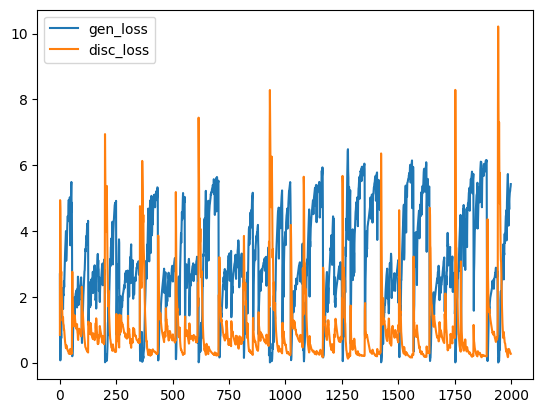

In [212]:
hist
plt.plot(hist['gen_loss'], label = "gen_loss")
plt.plot(hist['disc_loss'], label = "disc_loss")
plt.legend()
plt.show()
plt.close()

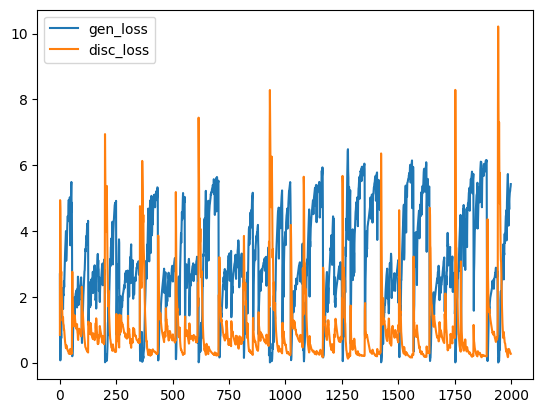

In [221]:
hist
plt.plot(hist['gen_loss'], label = "gen_loss")
plt.plot(hist['disc_loss'], label = "disc_loss")
plt.legend()
plt.show()
plt.close()

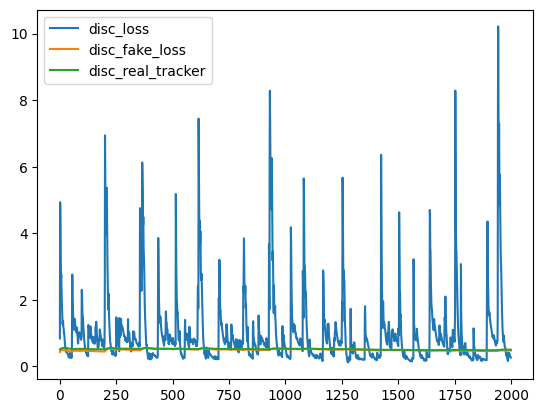

In [222]:
hist
plt.plot(hist['disc_loss'], label = "disc_loss")
plt.plot(hist['disc_fake_loss'], label = "disc_fake_loss")
plt.plot(hist['disc_real_tracker'], label = "disc_real_tracker")
plt.legend()
plt.show()
plt.close()

# viz evaluation

In [223]:
latent_dim

20

In [224]:
number_of_points = 1000
noise = tf.random.normal([number_of_points, latent_dim])
generated_x = generator(noise, training=False)
generated_data = pd.DataFrame(generated_x, columns=data.columns)

In [225]:
#reverse enc
generated_new = pd.DataFrame(columns= X_atr, index=range(number_of_points) )
for prefix in X_atr:
    prefix_cols = [feature for feature in data.columns if prefix in feature]
    print(prefix_cols)
    generated_new[prefix] = np.argmax(generated_data[prefix_cols].values, axis=1)
generated_new

['age_cat_0.0', 'age_cat_1.0', 'age_cat_2.0']
['juv_fel_count_0.0', 'juv_fel_count_1.0', 'juv_fel_count_2.0', 'juv_fel_count_3.0', 'juv_fel_count_4.0', 'juv_fel_count_5.0', 'juv_fel_count_6.0', 'juv_fel_count_7.0', 'juv_fel_count_8.0', 'juv_fel_count_9.0', 'juv_fel_count_10.0']
['juv_misd_count_0.0', 'juv_misd_count_1.0', 'juv_misd_count_2.0', 'juv_misd_count_3.0', 'juv_misd_count_4.0', 'juv_misd_count_5.0', 'juv_misd_count_6.0', 'juv_misd_count_7.0', 'juv_misd_count_8.0', 'juv_misd_count_9.0']
['juv_other_count_0.0', 'juv_other_count_1.0', 'juv_other_count_2.0', 'juv_other_count_3.0', 'juv_other_count_4.0', 'juv_other_count_5.0', 'juv_other_count_6.0', 'juv_other_count_7.0', 'juv_other_count_8.0', 'juv_other_count_9.0']
['priors_count_0.0', 'priors_count_1.0', 'priors_count_2.0', 'priors_count_3.0', 'priors_count_4.0', 'priors_count_5.0', 'priors_count_6.0', 'priors_count_7.0', 'priors_count_8.0', 'priors_count_9.0', 'priors_count_10.0', 'priors_count_11.0', 'priors_count_12.0', 'prio

,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
0,1,0,0,0,3,0
1,1,0,0,0,3,0
2,1,0,0,0,3,0
3,1,0,0,0,3,0
4,1,0,0,0,3,0
...,...,...,...,...,...,...
995,1,0,0,0,3,0
996,1,0,0,0,3,0
997,1,0,0,0,3,0
998,1,0,0,0,3,0


In [226]:
generated_new.describe()

,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,1.0,0.0,0.0,0.0,3.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,3.0,0.0
25%,1.0,0.0,0.0,0.0,3.0,0.0
50%,1.0,0.0,0.0,0.0,3.0,0.0
75%,1.0,0.0,0.0,0.0,3.0,0.0
max,1.0,0.0,0.0,0.0,3.0,0.0


In [227]:
np.argmax(generated_data[prefix_cols].values,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

KeyError: 'age_cat_0.0'

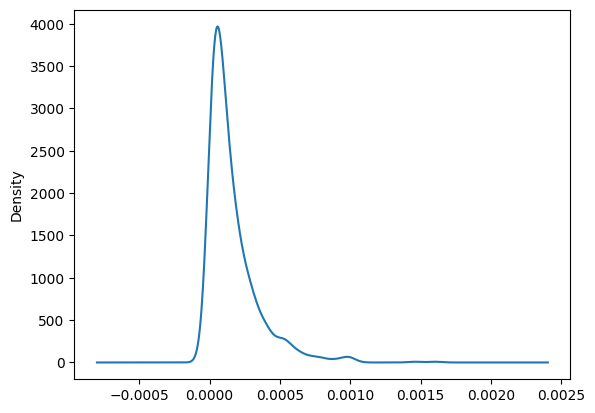

In [220]:
for feature in data.columns:
    plt.figure()
    generated_data[feature].plot.kde(label="generated")
    train_data[feature].plot.kde(label="train")
    plt.title(feature)
    plt.legend()
    plt.show()
    plt.close()

In [193]:
generated_data

,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
0,0.0,10.315630,0.000000,9.706468,0.000000,0.0
1,0.0,0.000000,5.454772,2.002204,17.062330,0.0
2,0.0,12.930139,0.000000,13.500210,0.000000,0.0
3,0.0,0.000000,15.172934,14.276008,25.890448,0.0
4,0.0,0.000000,4.442349,9.343571,1.863032,0.0
...,...,...,...,...,...,...
95,0.0,14.454542,0.000000,14.018885,0.000000,0.0
96,0.0,13.919475,1.244239,21.704508,0.000000,0.0
97,0.0,23.974848,0.000000,26.255964,0.000000,0.0
98,0.0,16.090891,0.000000,14.764149,0.000000,0.0


In [194]:
generated_data.describe()

,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
count,100.0,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.0,7.574506,2.455076,11.081705,4.189482,0.0
std,0.0,9.349852,3.147698,10.734447,6.230231,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,2.005122,0.000000,0.0
50%,0.0,4.014022,0.918243,8.670630,1.112883,0.0
75%,0.0,12.965807,4.524726,16.687838,5.949774,0.0
max,0.0,36.241627,15.172934,47.051430,29.158590,0.0


In [195]:
train_data[X_atr].describe()

,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,-0.001293,0.001624,0.002883,-0.001404,-0.001963,0.004607
std,0.998840,1.042430,1.034298,1.005314,0.997992,0.998657
min,-1.534260,-0.141855,-0.187414,-0.218065,-0.711240,-1.353233
25%,-0.009931,-0.141855,-0.187414,-0.218065,-0.711240,-1.353233
50%,-0.009931,-0.141855,-0.187414,-0.218065,-0.301588,0.738971
75%,-0.009931,-0.141855,-0.187414,-0.218065,0.312889,0.738971
max,1.514398,42.057697,26.605391,33.676788,7.072136,0.738971


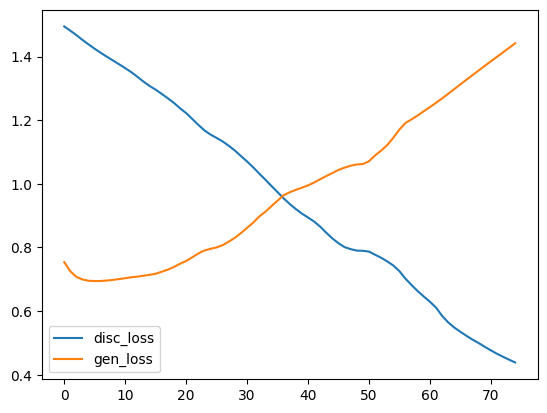

In [175]:
hist
plt.plot(hist['disc_loss'], label = "disc_loss")
plt.plot(hist['gen_loss'], label = "gen_loss")
plt.legend()
plt.show()
plt.close()

In [64]:
noise = tf.random.normal([100, latent_dim])
generated_x = generator(noise, training=False)

<AxesSubplot: ylabel='Density'>

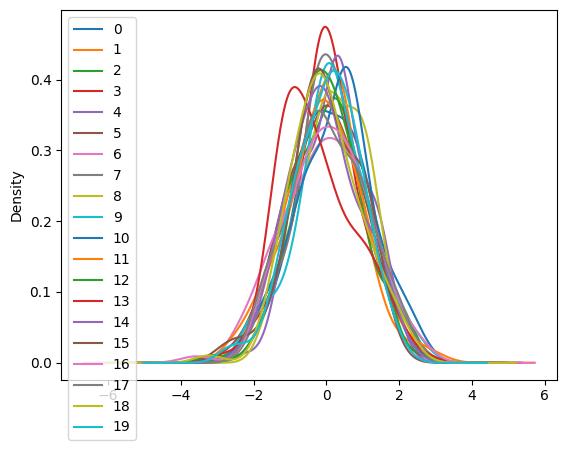

In [65]:
pd.DataFrame(noise).plot.kde()

In [66]:
pd.DataFrame(generated_x).describe()

,0,1,2,3,4,5
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.003112,0.070236,0.008674,0.943847,0.932123,0.309715
std,0.012306,0.080932,0.032889,0.976649,1.041949,0.369886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001819,0.000000,0.123816,0.015237,0.000000
50%,0.000000,0.044996,0.000000,0.629784,0.562222,0.164797
75%,0.000000,0.108645,0.000000,1.469490,1.368720,0.496185
max,0.084562,0.415466,0.232838,3.992156,4.240798,1.644156


<AxesSubplot: ylabel='Density'>

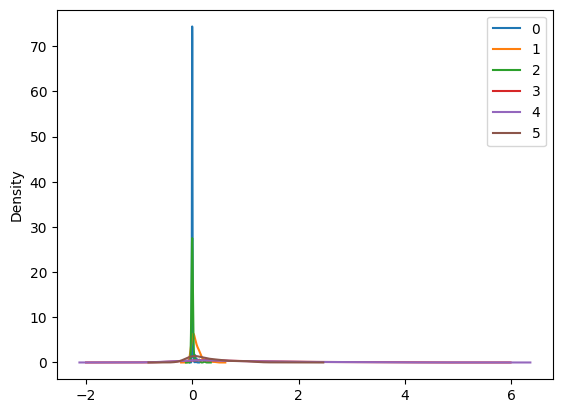

In [67]:
pd.DataFrame(generated_x).plot.kde()

<AxesSubplot: ylabel='Density'>

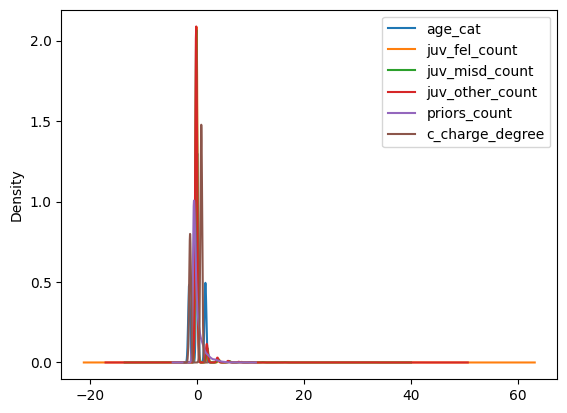

In [68]:
train_data[X_atr].plot.kde()

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

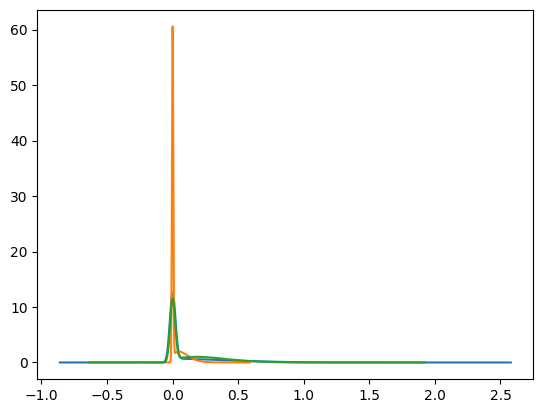

In [35]:
pd.DataFrame(generated_x).plot.kde()

In [18]:
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 6)                 24        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [20]:
input_x = tf.keras.Input((6, ))
x = tf.keras.layers.Dense(3, "relu")
x = tf.keras.layers.Dense(3, "relu")(x)
z = tf.keras.layers.Dense(2, "relu")

In [21]:
tf.keras.layers.Dense(3, "relu")